# Домашка 
---------------------------------------

tldr:
    
* Выбрать архитектуру из рассказанных NST, pix2pix, CycleGAN$^1$
* Подберите к ней задачу, чтобы она вам нравилась
* Подберите еще одну задачу, которая уже решена (если не NST)
* Повторите решение, которое уже есть$^2$ (если не NST)
* Решите свою задачу

---------------------------------------
1. Расположены в порядке возрастания сложности и крутизны
2. Поверьте если вы сделаете этот пункт следующий будет в *разы* легче

## Если вы выбрали Neural Style Transfer
---------------------------------------
Тут все довольно просто на первый и на второй взгляд. Поэтому недосотаточно просто написать свою функцию потерь и сдать ноутбук. Если вы хотите приличных баллов, то у вас есть две опции:


1. Вы разделяете картинку на две части и переносите на них разные стили. <p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала к одной чати картинки, а потом к другой.</span></p> От вас ожидается, что вы отдадите нейросети два картинки стиля и она внутри себя(скорее внутри лосс функции) разделит выходную картинку на две части и к одной части применит один стиль, а к другой - второй. 

2. Вы переносите *одновременно* два стиля на одну картинку контента.
<p><span style="color:red">Нельзя просто взять и два раза применить обычную архитектуру сначала с одним стилем, а потом с другим.</span></p>
От вас ожидается, что вы модифицируете модель(скорее лосс модели) для того, чтобы два стиля учитывались с разными весами. 

## Если вы выбрали pix2pix
---------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для pix2pix модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все безплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Если вы выбрали CycleGAN
--------------------------------------------
Здесь от вас ожидается, что вы реализуете свою архитектуру для CycleGAN модели. Пожалуйста не копируйте код из открытых репозиториев. Этот факт очень легко обнаружить. Перед тем, как приступить проверьте, что обе задачи, которые вы выбрали влезают на вашу видеокарту или на карту Google Colab. CycleGAN в этом смысле хуже, чем pix2pix, он ест больше памяти. Если они не влезают, но вам все равно очень хочется, то вы можете израсходовать все беcплатные триалы облаков(Google, Amazon, .. etc) во вселенной. 

## Remarks:
-----------------------------------------

* Это задание нужно для того, чтобы вы наступили на все грабли, что есть. Узнали об их существовании и научились обходить. Посмотрели на неработающие модели и поняли, что все тлен. Изгуглили весь интернет и в конце заставили это все работать. Поверьте, оно того стиот. Не откладывайте это задание на ночь перед сдачей, так как весь смысл \*пуф\* улетучится.

* У вас два союзника в этой борьбе:
    1. Оригинальная статья, те психи, что ее писала как то заставили свою модель работать. Их мысли, которыми они спроводили свое детище, позволят вам написать свой вариант алгоритма. 
    2. Гугл, он знает ответы на почти все ваши вопросы, но у него есть две ипостаси одна простая в обещении и вы все ее занаете(русскоязычная), а есть еще одна, которая кусается, но знает больше(англоязычная). Если не знаете языва - учите на ходу :)
    
* На самом деле у вас есть еще один союзник, это ментор проекта(или лектор или семинарист). Его ресурсом нужно пользоваться в ситуации, в которой вы не можете(занчит попытались и не вышло) найти ответов, используя Гугл и статью.

* Сдавать это все нужно следующим образом. Код вы кидаете на github и отправляете ссылку туда, куда вам сказали(в телеграм, степик или еще куда-то)

In [1]:
!pip3 install pillow
!pip3 install torch
!pip3 install torchvision
!pip3 install tqdm
!pip3 install matplotlib
import numpy
!pip3 install opencv-python

In [0]:

!mkdir weights && cd weights && mkdir rain



In [0]:
# модель из следующего источника: https://github.com/Lornatang/CycleGAN-PyTorch
# использовался датасет cezanne2photo со следующего источника: https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/cezanne2photo.zip
"""
import torch
import torch.nn as nn
import torch.nn.functional as F


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.main = nn.Sequential(
            nn.Conv2d(3, 64, 4, stride=2, padding=1),
            nn.PReLU(init = 0.2),

            nn.Conv2d(64, 128, 4, stride=2, padding=1),
            nn.LayerNorm(128),
            nn.PReLU(init = 0.2),

            nn.Conv2d(128, 256, 4, stride=2, padding=1),
            nn.LayerNorm(256),
            nn.PReLU(init = 0.2),

            nn.Conv2d(256, 512, 4, padding=1),
            nn.LayerNorm(512),
            nn.PReLU(init = 0.2),

            nn.Conv2d(512, 1024, 4, padding=1),
            nn.LayerNorm(1024),
            nn.PReLU(init = 0.2),

            nn.Conv2d(1024, 1, 4, padding=1),
        )

    def forward(self, x):
        x = self.main(x)
        x = F.avg_pool2d(x, x.size()[2:])
        x = torch.flatten(x, 1)
        return x


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Initial convolution block
            nn.ReflectionPad2d(3),
            nn.Conv2d(3, 64, 7),
            nn.LayerNorm(256),
            nn.ReLU(inplace=True),

            # Downsampling
            nn.Conv2d(64, 128, 3, stride=2, padding=1),
            nn.LayerNorm(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, 3, stride=2, padding=1),
            nn.InstanceNorm2d(256),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 512, 3, stride=2, padding=1),
            nn.InstanceNorm2d(512),
            nn.ReLU(inplace=True),

            # Residual blocks
            ResidualBlock(512),
            ResidualBlock(512),
            ResidualBlock(512),
            ResidualBlock(512),
            ResidualBlock(512),
            ResidualBlock(512),
            ResidualBlock(512),
            ResidualBlock(512),
            ResidualBlock(512),

            # Upsampling
            nn.Upsample(2),
            nn.Conv2d(512, 256, 3, stride=2, padding=1),
            nn.LayerNorm(1),
            nn.ReLU(inplace=True),
            nn.Upsample(2),
            nn.Conv2d(256, 128, 3, stride=2, padding=1),
            nn.LayerNorm(1),
            nn.ReLU(inplace=True),
            nn.Upsample(2),
            nn.Conv2d(128, 64, 3, stride=2, padding=1),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True),

            # Output layer
            nn.InstanceNorm2d(3),
            nn.Conv2d(64, 3, 7),
            nn.Tanh()
        )

    def forward(self, x):
        return self.main(x)


class ResidualBlock(nn.Module):
    def __init__(self, in_channels):
        super(ResidualBlock, self).__init__()

        self.res = nn.Sequential(nn.ReflectionPad2d(1),
                                 nn.Conv2d(in_channels, in_channels, 3),
                                 nn.LayerNorm(int(in_channels/16)),
                                 nn.ReLU(inplace=True),
                                 nn.ReflectionPad2d(1),
                                 nn.Conv2d(in_channels, in_channels, 3),
                                 nn.LayerNorm(int(in_channels/16)))

    def forward(self, x):
        return x + self.res(x)

Обученная нейросеть неплохо переводит картины(пейзажи) в фотографии, но при обработки картин с людьми, людей она стирает. Пример ниже.

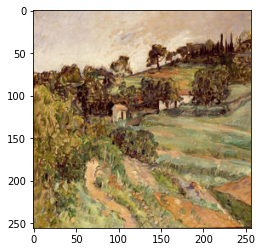

In [0]:
# оригинальное
import matplotlib.pyplot as plt
img=Image.open('/content/data/cezanne2photo/test/A/00220.jpg')
plt.imshow(img)

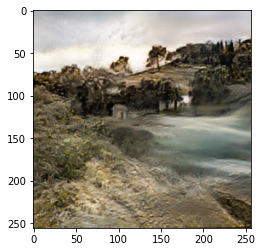

In [0]:
#результат
import matplotlib.pyplot as plt
img=Image.open('result.png')
plt.imshow(img)

При переводе фотографий в картины -- работает хуже. Пример ниже

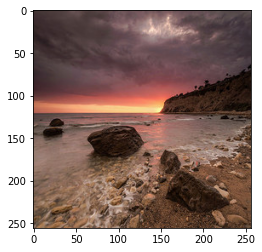

In [0]:
#оригинальное
import matplotlib.pyplot as plt
img=Image.open('/content/data/cezanne2photo/test/B/2014-08-04 23:37:50.jpg')
plt.imshow(img)

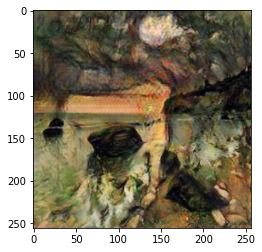

In [0]:
#результат
import matplotlib.pyplot as plt
img=Image.open('result.png')
plt.imshow(img)

**Своя архитектура CycleGAN **

In [0]:
# реализация своей архитектуры для CycleGAN 

import torch
import torch.nn as nn
import torch.nn.functional as F


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.main = nn.Sequential(
            nn.ReflectionPad2d(1),
            nn.Conv2d(3,  64, 3, 1, bias=False),
            nn.BatchNorm2d(64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(64,  128, 3, 1, bias=False),
            nn.BatchNorm2d(128),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(128, 256, 3, 1, bias=False),

        )
        

    def forward(self, x):
        x = self.main(x)
        x = F.avg_pool2d(x, x.size()[2:])
        x = torch.flatten(x, 1)
        return x


class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.main = nn.Sequential(
            # Initial convolution block
            
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.InstanceNorm2d(256),
            nn.ReLU(inplace=True))
        
        self.main3 = nn.Sequential(  
            nn.Conv2d(256, 128, kernel_size=3, padding=1),
            nn.InstanceNorm2d(128),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 64, kernel_size=3, padding=1),
            nn.InstanceNorm2d(64),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 3, kernel_size=3, padding=1),
            nn.Tanh()

        )

    def forward(self, x):
        x=self.main(x)
        x=self.main3(x)
        return x




In [0]:


import glob
import os
import random
import time
from threading import Thread

import cv2
import numpy as np
from PIL import Image
from torch.utils.data import Dataset


class ImageDataset(Dataset):
    def __init__(self, root, transform=None, unaligned=False, mode="train"):
        self.transform = transform
        self.unaligned = unaligned

        self.files_A = sorted(glob.glob(os.path.join(root, f"{mode}/A") + "/*.*"))
        self.files_B = sorted(glob.glob(os.path.join(root, f"{mode}/B") + "/*.*"))

    def __getitem__(self, index):
        item_A = self.transform(Image.open(self.files_A[index % len(self.files_A)]))

        if self.unaligned:
            item_B = self.transform(Image.open(self.files_B[random.randint(0, len(self.files_B) - 1)]))
        else:
            item_B = self.transform(Image.open(self.files_B[index % len(self.files_B)]))

        return {"A": item_A, "B": item_B}

    def __len__(self):
        return max(len(self.files_A), len(self.files_B))

In [0]:


class DecayLR:
    def __init__(self, epochs, offset, decay_epochs):
        epoch_flag = epochs - decay_epochs
        assert (epoch_flag > 0), "Decay must start before the training session ends!"
        self.epochs = epochs
        self.offset = offset
        self.decay_epochs = decay_epochs

    def step(self, epoch):
        return 1.0 - max(0, epoch + self.offset - self.decay_epochs) / (
                self.epochs - self.decay_epochs)

In [0]:


import random

import torch


class ReplayBuffer:
    def __init__(self, max_size=50):
        assert (max_size > 0), "Empty buffer or trying to create a black hole. Be careful."
        self.max_size = max_size
        self.data = []

    def push_and_pop(self, data):
        to_return = []
        for element in data.data:
            element = torch.unsqueeze(element, 0)
            if len(self.data) < self.max_size:
                self.data.append(element)
                to_return.append(element)
            else:
                if random.uniform(0, 1) > 0.5:
                    i = random.randint(0, self.max_size - 1)
                    to_return.append(self.data[i].clone())
                    self.data[i] = element
                else:
                    to_return.append(element)
        return torch.cat(to_return)


# custom weights initialization called on netG and netD
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find("Conv") != -1:
        torch.nn.init.normal_(m.weight, 0.0, 0.02)
    elif classname.find("BatchNorm") != -1:
        torch.nn.init.normal_(m.weight, 1.0, 0.02)
        torch.nn.init.zeros_(m.bias)

In [12]:

import argparse
import random
import time

import torch.backends.cudnn as cudnn
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.utils as vutils
from PIL import Image

#from cyclegan_pytorch import Generator


file = "/content/gdrive/My Drive/Colab Notebooks/GanR/data/rain/test/B/38.jpg"
model_name = "/content/gdrive/My Drive/Colab Notebooks/GanR/weights/rain149/netG_B2A_epoch_149.pth"

image_size = 256

cudnn.benchmark = True
device = torch.device("cuda:0")

# create model
model = Generator().to(device)

# Load state dicts
model.load_state_dict(torch.load(model_name))

# Set model mode
model.eval()

# Load image
image = Image.open(file)
pre_process = transforms.Compose([transforms.Resize(image_size),
                                  transforms.ToTensor(),
                                  transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
                                  ])
image = pre_process(image).unsqueeze(0)
image = image.to(device)

start = time.clock()
fake_image = model(image)
elapsed = (time.clock() - start)
print(f"cost {elapsed:.4f}s")
vutils.save_image(fake_image.detach(), "result.png", normalize=True)


cost 0.0264s


**Преобразование дождливой погоды в ясную**

На примере изображений №199 хорошо видно, что линии дождя/града исчезают и освещение становится солнечным

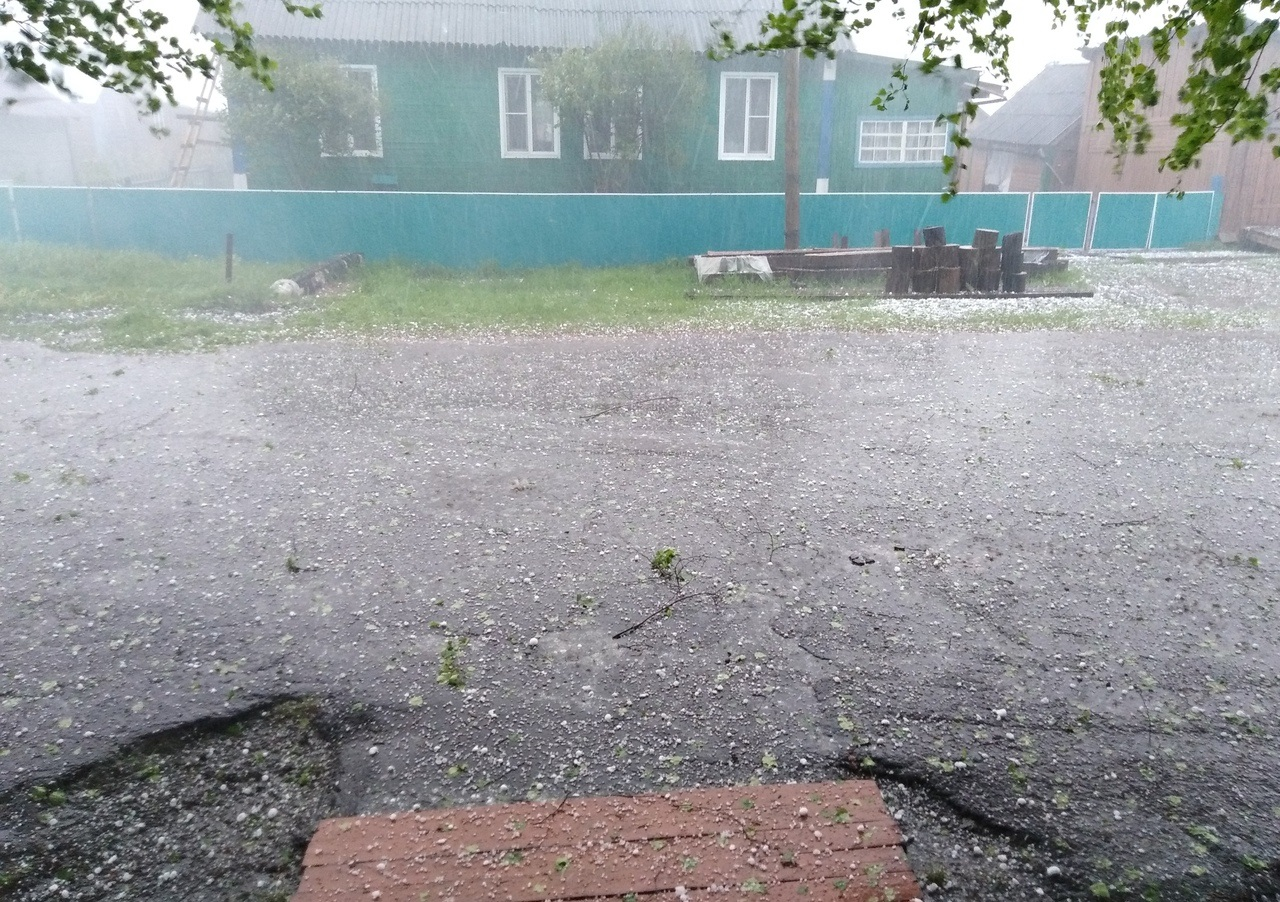

In [9]:
# 199 
from IPython.display import Image, display
display(Image('/content/gdrive/My Drive/Colab Notebooks/GanR/data/rain/test/B/199.jpg'))

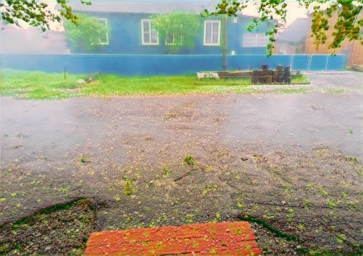

In [10]:
# 199
from IPython.display import Image, display
display(Image('result.png'))

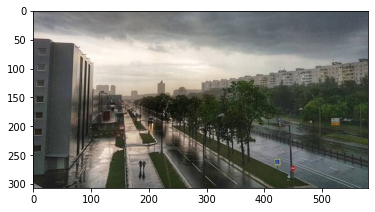

In [7]:
#22 оригинальное
import matplotlib.pyplot as plt
img=Image.open('/content/gdrive/My Drive/Colab Notebooks/GanR/data/rain/test/B/22.jpg')
plt.imshow(img)

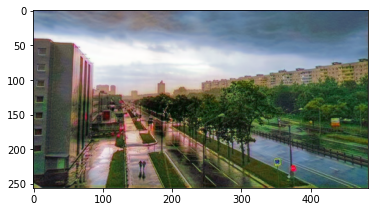

In [8]:
#22 результат
img=Image.open('result.png')
plt.imshow(img)

**Теперь проверим работу в обратной направлении: дорисовывание дождя**

На втором изображении №129 видны появления полос осадков

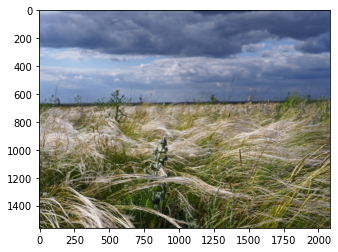

In [4]:
#129 оригинальное
import matplotlib.pyplot as plt
img=Image.open('/content/gdrive/My Drive/Colab Notebooks/GanR/data/rain/test/A/129.jpg')
plt.imshow(img)

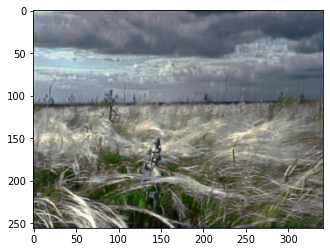

In [3]:
#129 результат (дорисовка дождя)
img=Image.open('result.png')
plt.imshow(img)

Данную архитектуру нейронной сети хорошо применять для раскрашивания изображений. Она верно передаёт цвета. Для примера приведены изображения под №13.

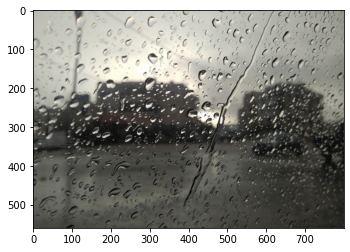

In [11]:
#13 оригинальное
import matplotlib.pyplot as plt
img=Image.open('/content/gdrive/My Drive/Colab Notebooks/GanR/data/rain/test/B/13.jpg')
plt.imshow(img)

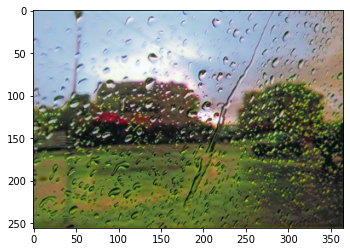

In [10]:
#13 результат
img=Image.open('result.png')
plt.imshow(img)

In [0]:
# Обучение
import torch.backends.cudnn as cudnn
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.utils as vutils
from PIL import Image
from tqdm import tqdm
import argparse
import itertools
import os
import random



adataroot = "/content/gdrive/My Drive/Colab Notebooks/GanR/data"
adataset = "rain"
aepochs = 150
adecay_epochs = 100
abatch_size = 6
alr = 0.0002
ap = 100
anetG_A2B = ""
anetG_B2A = ""
anetD_A = ""
anetD_B = ""
aimage_size = 256
aoutf = "./outputs"
aprint_freq = 100

try:
    os.makedirs(aoutf)
except OSError:
    pass

try:
    os.makedirs("weights")
except OSError:
    pass


amanualSeed = random.randint(1, 10000)
print("Random Seed: ", amanualSeed)
random.seed(amanualSeed)
torch.manual_seed(amanualSeed)

cudnn.benchmark = True


# Dataset
dataset = ImageDataset(root=os.path.join(adataroot, adataset),
                       transform=transforms.Compose([
                           transforms.Resize(int(aimage_size * 1.12), Image.BICUBIC),
                           transforms.RandomCrop(aimage_size),
                           transforms.RandomHorizontalFlip(),
                           transforms.ToTensor(),
                           transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]),
                       unaligned=True)

dataloader = torch.utils.data.DataLoader(dataset, batch_size=abatch_size, shuffle=True, pin_memory=True)

try:
    os.makedirs(os.path.join(aoutf, adataset, "A"))
    os.makedirs(os.path.join(aoutf, adataset, "B"))
except OSError:
    pass

try:
    os.makedirs(os.path.join("weights", adataset))
except OSError:
    pass

device = torch.device("cuda:0")

# create model
netG_A2B = Generator().to(device)
netG_B2A = Generator().to(device)
netD_A = Discriminator().to(device)
netD_B = Discriminator().to(device)

netG_A2B.apply(weights_init)
netG_B2A.apply(weights_init)
netD_A.apply(weights_init)
netD_B.apply(weights_init)


# define loss function (adversarial_loss) and optimizer
cycle_loss = torch.nn.L1Loss().to(device)
identity_loss = torch.nn.L1Loss().to(device)
adversarial_loss = torch.nn.MSELoss().to(device)

# Optimizers
optimizer_G = torch.optim.Adam(itertools.chain(netG_A2B.parameters(), netG_B2A.parameters()),
                               lr=alr, betas=(0.5, 0.999))
optimizer_D_A = torch.optim.Adam(netD_A.parameters(), lr=alr, betas=(0.5, 0.999))
optimizer_D_B = torch.optim.Adam(netD_B.parameters(), lr=alr, betas=(0.5, 0.999))

lr_lambda = DecayLR(aepochs, 0, adecay_epochs).step
lr_scheduler_G = torch.optim.lr_scheduler.LambdaLR(optimizer_G, lr_lambda=lr_lambda)
lr_scheduler_D_A = torch.optim.lr_scheduler.LambdaLR(optimizer_D_A, lr_lambda=lr_lambda)
lr_scheduler_D_B = torch.optim.lr_scheduler.LambdaLR(optimizer_D_B, lr_lambda=lr_lambda)

g_losses = []
d_losses = []

identity_losses = []
gan_losses = []
cycle_losses = []

fake_A_buffer = ReplayBuffer()
fake_B_buffer = ReplayBuffer()

for epoch in range(0, aepochs):
    progress_bar = tqdm(enumerate(dataloader), total=len(dataloader))

    for i, data in progress_bar:
        
        # get batch size data
        real_image_A = data["A"].to(device)
        real_image_B = data["B"].to(device)
        batch_size = real_image_A.size(0)

        # real data label is 1, fake data label is 0.
        real_label = torch.full((batch_size, 1), 1, device=device, dtype=torch.float32)
        fake_label = torch.full((batch_size, 1), 0, device=device, dtype=torch.float32)

        ##############################################
        # (1) Update G network: Generators A2B and B2A
        ##############################################
        
        # Set G_A and G_B's gradients to zero
        optimizer_G.zero_grad()
        

        # Identity loss
        # G_B2A(A) should equal A if real A is fed
        identity_image_A = netG_B2A(real_image_A)
        loss_identity_A = identity_loss(identity_image_A, real_image_A) * 5.0
        # G_A2B(B) should equal B if real B is fed
        identity_image_B = netG_A2B(real_image_B)
        loss_identity_B = identity_loss(identity_image_B, real_image_B) * 5.0

        # GAN loss
        # GAN loss D_A(G_A(A))
        fake_image_A = netG_B2A(real_image_B)
        fake_output_A = netD_A(fake_image_A)
        loss_GAN_B2A = adversarial_loss(fake_output_A, real_label)
        # GAN loss D_B(G_B(B))
        fake_image_B = netG_A2B(real_image_A)
        fake_output_B = netD_B(fake_image_B)
        loss_GAN_A2B = adversarial_loss(fake_output_B, real_label)

        # Cycle loss
        recovered_image_A = netG_B2A(fake_image_B)
        loss_cycle_ABA = cycle_loss(recovered_image_A, real_image_A) * 10.0

        recovered_image_B = netG_A2B(fake_image_A)
        loss_cycle_BAB = cycle_loss(recovered_image_B, real_image_B) * 10.0

        # Combined loss and calculate gradients
        errG = loss_identity_A + loss_identity_B + loss_GAN_A2B + loss_GAN_B2A + loss_cycle_ABA + loss_cycle_BAB

        # Calculate gradients for G_A and G_B
        errG.backward()
        # Update G_A and G_B's weights
        optimizer_G.step()

        ##############################################
        # (2) Update D network: Discriminator A
        ##############################################
        
        # Set D_A gradients to zero
        optimizer_D_A.zero_grad()

        # Real A image loss
        real_output_A = netD_A(real_image_A)
        errD_real_A = adversarial_loss(real_output_A, real_label)

        # Fake A image loss
        fake_image_A = fake_A_buffer.push_and_pop(fake_image_A)
        fake_output_A = netD_A(fake_image_A.detach())
        errD_fake_A = adversarial_loss(fake_output_A, fake_label)

        # Combined loss and calculate gradients
        errD_A = (errD_real_A + errD_fake_A) / 2

        # Calculate gradients for D_A
        errD_A.backward()
        # Update D_A weights
        optimizer_D_A.step()

        ##############################################
        # (3) Update D network: Discriminator B
        ##############################################
        
        # Set D_B gradients to zero
        optimizer_D_B.zero_grad()

        # Real B image loss
        real_output_B = netD_B(real_image_B)
        errD_real_B = adversarial_loss(real_output_B, real_label)

        # Fake B image loss
        fake_image_B = fake_B_buffer.push_and_pop(fake_image_B)
        fake_output_B = netD_B(fake_image_B.detach())
        errD_fake_B = adversarial_loss(fake_output_B, fake_label)

        # Combined loss and calculate gradients
        errD_B = (errD_real_B + errD_fake_B) / 2

        # Calculate gradients for D_B
        errD_B.backward()
        # Update D_B weights
        optimizer_D_B.step()
        

        progress_bar.set_description(
            f"[{epoch}/{aepochs - 1}][{i}/{len(dataloader) - 1}] "
            f"Loss_D: {(errD_A + errD_B).item():.4f} "
            f"Loss_G: {errG.item():.4f} "
            f"Loss_G_identity: {(loss_identity_A + loss_identity_B).item():.4f} "
            f"loss_G_GAN: {(loss_GAN_A2B + loss_GAN_B2A).item():.4f} "
            f"loss_G_cycle: {(loss_cycle_ABA + loss_cycle_BAB).item():.4f}")
        

        if i % aprint_freq == 0:
            vutils.save_image(real_image_A,
                              f"{aoutf}/{adataset}/A/real_samples.png",
                              normalize=True)
            vutils.save_image(real_image_B,
                              f"{aoutf}/{adataset}/B/real_samples.png",
                              normalize=True)

            fake_image_A = 0.5 * (netG_B2A(real_image_B).data + 1.0)
            fake_image_B = 0.5 * (netG_A2B(real_image_A).data + 1.0)

            vutils.save_image(fake_image_A.detach(),
                              f"{aoutf}/{adataset}/A/fake_samples_epoch_{epoch}.png",
                              normalize=True)
            vutils.save_image(fake_image_B.detach(),
                              f"{aoutf}/{adataset}/B/fake_samples_epoch_{epoch}.png",
                              normalize=True)
            

    # do check pointing
    torch.save(netG_A2B.state_dict(), f"weights/{adataset}/netG_A2B_epoch_{epoch}.pth")
    torch.save(netG_B2A.state_dict(), f"weights/{adataset}/netG_B2A_epoch_{epoch}.pth")
    torch.save(netD_A.state_dict(), f"weights/{adataset}/netD_A_epoch_{epoch}.pth")
    torch.save(netD_B.state_dict(), f"weights/{adataset}/netD_B_epoch_{epoch}.pth")

    #test_images(model_name=f"weights/{adataset}/netG_A2B_epoch_{epoch}.pth")

    model_save_nameG_A2B = f"weights/{adataset}/netG_A2B_epoch_{epoch}.pth"
    model_save_nameG_B2A = f"weights/{adataset}/netG_B2A_epoch_{epoch}.pth"
    model_save_nameD_A = f"weights/{adataset}/netD_A_epoch_{epoch}.pth"
    model_save_nameD_B = f"weights/{adataset}/netD_B_epoch_{epoch}.pth"

    path = F"/content/gdrive/My Drive/Colab Notebooks/GanR/{model_save_nameG_A2B}"
    torch.save(netG_A2B.state_dict(), path)
    path = F"/content/gdrive/My Drive/Colab Notebooks/GanR/{model_save_nameG_B2A}"
    torch.save(netG_B2A.state_dict(), path)
    path = F"/content/gdrive/My Drive/Colab Notebooks/GanR/{model_save_nameD_A}"
    torch.save(netD_A.state_dict(), path)
    path = F"/content/gdrive/My Drive/Colab Notebooks/GanR/{model_save_nameD_B}"
    torch.save(netD_B.state_dict(), path)
    


    # Update learning rates
    lr_scheduler_G.step()
    lr_scheduler_D_A.step()
    lr_scheduler_D_B.step()

# save last check pointing
torch.save(netG_A2B.state_dict(), f"weights/{adataset}/netG_A2B.pth")
torch.save(netG_B2A.state_dict(), f"weights/{adataset}/netG_B2A.pth")
torch.save(netD_A.state_dict(), f"weights/{adataset}/netD_A.pth")
torch.save(netD_B.state_dict(), f"weights/{adataset}/netD_B.pth")

Random Seed:  2995


  0%|          | 0/44 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([6, 1])) that is different to the input size (torch.Size([6, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
[0/149][42/43] Loss_D: 0.4876 Loss_G: 6.6877 Loss_G_identity: 1.9877 loss_G_GAN: 0.5223 loss_G_cycle: 4.1777:  98%|█████████▊| 43/44 [04:33<00:05,  5.12s/it]/usr/local/lib/python3.6/dist-packages/torch/nn/modules/loss.py:432: UserWarning: Using a target size (torch.Size([5, 1])) that is different to the input size (torch.Size([5, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
[0/149][43/43] Loss_D: 0.4711 Loss_G: 6.3956 Loss_G_identity: 1.9332 loss_G_GAN: 0.4869 loss_G_cycle: 3.9755: 1

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


Открыт доступ по ссылке к весам netG_A2B.pth (149 эпоха): https://drive.google.com/file/d/1awDaStvsPIvoXekpYBsXRb8rSSkOi5HW/view?usp=sharing

Открыт доступ по ссылке к весам netG_B2A.pth (149 эпоха): https://drive.google.com/file/d/1au_0InjtNNemB4WOPyaVD8vUlrIFyeXP/view?usp=sharing

Открыт доступ по ссылке к датасету: https://drive.google.com/drive/folders/12K1pwHR2u9E_xYq-vy6i2xsbNumO7Qws?usp=sharing